<a href="https://colab.research.google.com/github/7jadhavAbhi7/Sentiment_Analyzer/blob/master/Yet_another_copy_of_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df['review']=df['review'].str.lower()

In [ ]:
import regex as re
def html_remover(text):
  clean=re.sub(r'<[^>]*>','',text)
  return clean


In [ ]:
df['review']=df['review'].apply(html_remover)
df.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
5,"probably my all-time favorite movie, a story o...",positive
6,i sure would like to see a resurrection of a u...,positive
7,"this show was an amazing, fresh & innovative i...",negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


In [ ]:
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

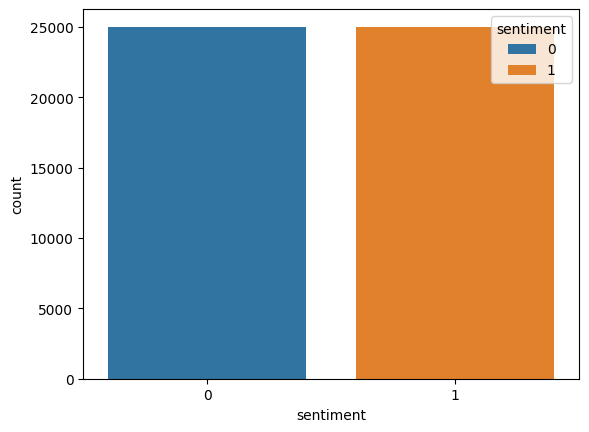

In [ ]:
import seaborn as sns
sns.countplot(data=df,x='sentiment',hue='sentiment')

In [ ]:
def url_remover(text):
  clean1=re.sub(r'https?://\S+|www\.\S+','',text)

  return clean1

In [ ]:
df['review']=df['review'].apply(url_remover)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
  stop_words=set(stopwords.words('english'))
  words=nltk.word_tokenize(text)
  clean_words=[word for word in words if word not in stop_words]
  clean_text=' '.join(clean_words)
  return clean_text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['review']=df['review'].apply(remove_stopwords)
df['review'].head(10)

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production . filming techniqu...
2    thought wonderful way spend time hot summer we...
3    basically 's family little boy ( jake ) thinks...
4    petter mattei 's `` love time money '' visuall...
5    probably all-time favorite movie , story selfl...
6    sure would like see resurrection dated seahunt...
7    show amazing , fresh & innovative idea 70 's f...
8    encouraged positive comments film looking forw...
9    like original gut wrenching laughter like movi...
Name: review, dtype: object

In [ ]:
import string
def remove_punctuation(text):
  for c in string.punctuation:
    text=text.replace(c,'')
  return text

In [ ]:
df['review']=df['review'].apply(remove_punctuation)

In [ ]:
df['review'][0]

'one reviewers mentioned watching 1 oz episode ll hooked  right  exactly happened methe first thing struck oz brutality unflinching scenes violence  set right word go  trust  show faint hearted timid  show pulls punches regards drugs  sex violence  hardcore  classic use wordit called oz nickname given oswald maximum security state penitentary  focuses mainly emerald city  experimental section prison cells glass fronts face inwards  privacy high agenda  em city home many  aryans  muslims  gangstas  latinos  christians  italians  irish  scuffles  death stares  dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows would nt dare  forget pretty pictures painted mainstream audiences  forget charm  forget romance  oz nt mess around  first episode ever saw struck nasty surreal  could nt say ready  watched  developed taste oz  got accustomed high levels graphic violence  violence  injustice  crooked guards ll sold nickel  inmates ll kill order get away  

In [ ]:
X=df.iloc[:,0:1]
X

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production filming technique...
2,thought wonderful way spend time hot summer we...
3,basically s family little boy jake thinks s ...
4,petter mattei s love time money visually stu...
...,...
49995,thought movie right good job nt creative orig...
49996,bad plot bad dialogue bad acting idiotic di...
49997,catholic taught parochial elementary schools n...
49998,m going disagree previous comment side maltin ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['sentiment']=label.fit_transform(df['sentiment'])
df['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
y=df['sentiment']
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(35000, 1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
custom_params = {
    'max_features': 1000,
    'ngram_range': (1, 2),
    'max_df': 0.8,
    'min_df': 5,
    'binary': True
}
cv=CountVectorizer(**custom_params)

In [ ]:
X_train_bow=cv.fit_transform(X_train['review']).toarray()
X_test_bow=cv.transform(X_test['review']).toarray()

In [ ]:
X_train_bow.shape

(35000, 1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_bow,y_train)

LogisticRegression()

In [ ]:
y_predict=model.predict(X_test_bow)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,y_predict)
print(accuracy)

0.8580666666666666


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
logistic_precision=precision_score(y_test,y_predict)
logistic_f1=f1_score(y_test,y_predict)
logistic_recall=recall_score(y_test,y_predict)

In [ ]:
y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
15168    1
49241    1
39317    0
42191    1
15109    1
Name: sentiment, Length: 15000, dtype: int64

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import numpy as np

# Define the classification algorithms
classification_algorithms = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

num_samples_train = len(X_train)
num_samples_test = len(X_test)
num_classification_algorithms = len(classification_algorithms)

predictions_train = np.zeros((num_samples_train, num_classification_algorithms))
predictions_test = np.zeros((num_samples_test, num_classification_algorithms))

for i, algorithm in enumerate(classification_algorithms):
    model = algorithm.fit(X_train_bow, y_train)
    predictions_train[:, i] = model.predict(X_train_bow)
    predictions_test[:, i] = model.predict(X_test_bow)

accuracies = []
precision_=[]
recall_=[]
f1_=[]
for i, algorithm in enumerate(classification_algorithms):
    accuracy = accuracy_score(y_test, predictions_test[:, i])
    precision=precision_score(y_test,predictions_test[:,i])
    recall=precision_score(y_test,predictions_test[:,i])
    f1=f1_score(y_test,predictions_test[:,i])
    accuracies.append(accuracy)
    precision_.append(precision)
    recall_.append(recall)
    f1_.append(f1)

    print(f"Accuracy of {algorithm.__class__.__name__}: {accuracy}")
best_classifier_index = np.argmax(accuracies)
best_classifier = classification_algorithms[best_classifier_index]
df1=pd.DataFrame({
    'Algorithm':[algorithm.__class__.__name__ for algorithm in classification_algorithms],
    'Accuracy':accuracies,
    'Precision':precision_,
    'recall':recall_,
    'f1':f1_
})

print(f"\nBest Classifier: {best_classifier.__class__.__name__}")

Accuracy of LogisticRegression: 0.8580666666666666
Accuracy of DecisionTreeClassifier: 0.7019333333333333
Accuracy of RandomForestClassifier: 0.8260666666666666
Accuracy of SVC: 0.8636
Accuracy of KNeighborsClassifier: 0.6346

Best Classifier: SVC


In [ ]:
# Save model to Google Drive
import joblib
joblib.dump(model, '/content/drive/My Drive/my_model.pkl')

['/content/drive/My Drive/my_model.pkl']

In [ ]:
load_model=joblib.load('/content/drive/My Drive/my_model.pkl')

In [ ]:
text = "The Dark knight was very good,I loved the movie"

In [ ]:
pro_text=[text]

In [ ]:
X_new_tf=cv.transform(pro_text).toarray()

In [ ]:
y_new_predict=load_model.predict(X_new_tf)
sentiment=label.inverse_transform(y_new_predict)
print(sentiment)

['negative']


##Simple Neural Network

###Preparing word embedding layer

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [ ]:
X1=list(df['review'])
# print(X1[2])

y1=list(df['sentiment'])
y1[2]

1

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30,random_state=42)

In [ ]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X1_train)

X1_train = word_tokenizer.texts_to_sequences(X1_train)
X1_test = word_tokenizer.texts_to_sequences(X1_test)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-04-17 04:38:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-04-17 04:38:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-17 04:38:15--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
print(word_tokenizer.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Padding all review to find fixed length

maxlen=100

X1_train=pad_sequences(X1_train,padding='post',maxlen=maxlen)
X1_test=pad_sequences(X1_test,padding='post',maxlen=maxlen)

In [ ]:
embedding_dim=100
embedding_dim={}

In [ ]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

150212

In [ ]:
key_print=list(embeddings_dictionary.keys())[:5]
for key in key_print:
  print(key,":",embeddings_dictionary[key])

the : [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.2

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(150212, 100)

In [ ]:
import tensorflow as tf

# Define the model
snn_model1 = tf.keras.Sequential()
# Add the embedding layer
embedding_layer = tf.keras.layers.Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
snn_model1.add(embedding_layer)
# Flatten the embedding output
snn_model1.add(tf.keras.layers.Flatten())
# Add a dense layer with sigmoid activation
snn_model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# Compile the model
snn_model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
# Print the model summary
snn_model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          15021200  
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 15031201 (57.34 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 15021200 (57.30 MB)
_________________________________________________________________


In [ ]:
X1[1]

'wonderful little production  filming technique unassuming oldtimebbc fashion gives comforting  sometimes discomforting  sense realism entire piece  actors extremely well chosen michael sheen  got polari  voices pat  truly see seamless editing guided references williams  diary entries  well worth watching terrificly written performed piece  masterful production one great master s comedy life  realism really comes home little things  fantasy guard  rather use traditional dream  techniques remains solid disappears  plays knowledge senses  particularly scenes concerning orton halliwell sets  particularly flat halliwell s murals decorating every surface  terribly well done '

In [ ]:
!pip install keras


In [ ]:
# Model training

X1_train_tensor = tf.convert_to_tensor(X1_train)
y1_train_tensor = tf.convert_to_tensor(y1_train)

snn_model_history1 = snn_model1.fit(X1_train_tensor, y1_train_tensor, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
219/219 [==============================] - 4s 12ms/step - loss: 0.6470 - accuracy: 0.6220 - val_loss: 0.5803 - val_accuracy: 0.7009
Epoch 2/6
219/219 [==============================] - 2s 11ms/step - loss: 0.5530 - accuracy: 0.7242 - val_loss: 0.5523 - val_accuracy: 0.7234
Epoch 3/6
219/219 [==============================] - 3s 12ms/step - loss: 0.5145 - accuracy: 0.7555 - val_loss: 0.5464 - val_accuracy: 0.7279
Epoch 4/6
219/219 [==============================] - 2s 10ms/step - loss: 0.4872 - accuracy: 0.7739 - val_loss: 0.5170 - val_accuracy: 0.7501
Epoch 5/6
219/219 [==============================] - 2s 11ms/step - loss: 0.4689 - accuracy: 0.7882 - val_loss: 0.5091 - val_accuracy: 0.7546
Epoch 6/6
219/219 [==============================] - 2s 11ms/step - loss: 0.4541 - accuracy: 0.7964 - val_loss: 0.5058 - val_accuracy: 0.7564


In [ ]:
# Evaluate the model
import numpy as np
loss, accuracy = snn_model1.evaluate(X1_test, np.array(y1_test))

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

469/469 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.7542
Test Loss: 0.5121963620185852
Test Accuracy: 0.7541999816894531


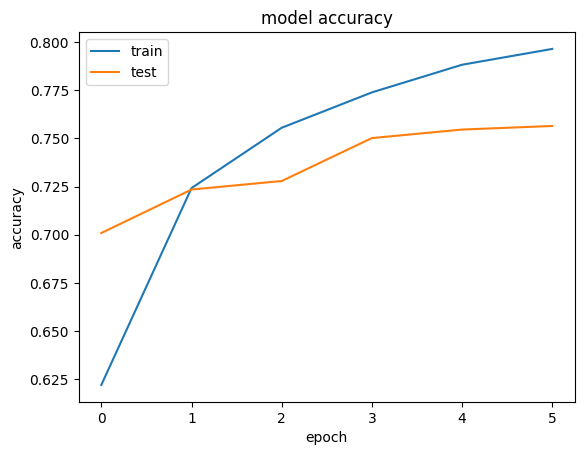

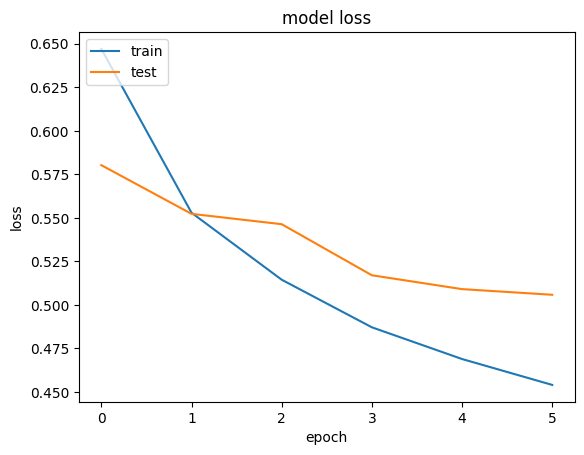

In [ ]:
import matplotlib.pyplot as plt

plt.plot(snn_model_history1.history['accuracy'])
plt.plot(snn_model_history1.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history1.history['loss'])
plt.plot(snn_model_history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
revieww=['This movie was boring musch more can be added like quality cinematograpy,dialogues.But overall movie was good']
tokenised=word_tokenizer.texts_to_sequences(revieww)

val=pad_sequences(tokenised,padding='post',maxlen=maxlen,truncating='post')
print(tokenised)
padded_input = pad_sequences([val[0]], maxlen=maxlen, padding='post', truncating='post')
prediction=snn_model1.predict(padded_input)
print(f'Probability of positive sentiment: {prediction}')

[[3392, 2, 21029, 234, 30228, 35506, 18257, 1091, 6, 364, 55239, 3835, 5583, 409, 2, 21029, 7]]
1/1 [==============================] - 0s 38ms/step
Probability of positive sentiment: [[0.545534]]


In [ ]:
import joblib
joblib.dump(snn_model1,'/content/drive/MyDrive/Simple_Nueral_Network_Model.pkl')

['/content/drive/MyDrive/Simple_Nueral_Network_Model.pkl']

###Convolutional Neural Network

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
# cnn_model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
#     tf.keras.layers.Conv1D(128, 5, activation='relu'),  # Convolutional layer with 128 filters and kernel size of 5
#     tf.keras.layers.MaxPooling1D(),  # Max pooling layer
#     tf.keras.layers.Flatten(),  # Flatten the output for input to dense layers
#     tf.keras.layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
#     tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
# ])

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Define the model
cnn_model11 = Sequential()

# Add the embedding layer
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
cnn_model11.add(embedding_layer)

# Add the convolutional layer
cnn_model11.add(Conv1D(128, 5, activation='relu'))

# Add the global max pooling layer
cnn_model11.add(GlobalMaxPooling1D())

# Add the output layer
cnn_model11.add(Dense(1, activation='sigmoid'))


In [ ]:
cnn_model11.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
X1[1]

'wonderful little production  filming technique unassuming oldtimebbc fashion gives comforting  sometimes discomforting  sense realism entire piece  actors extremely well chosen michael sheen  got polari  voices pat  truly see seamless editing guided references williams  diary entries  well worth watching terrificly written performed piece  masterful production one great master s comedy life  realism really comes home little things  fantasy guard  rather use traditional dream  techniques remains solid disappears  plays knowledge senses  particularly scenes concerning orton halliwell sets  particularly flat halliwell s murals decorating every surface  terribly well done '

In [ ]:

cnn_model_history1 = cnn_model11.fit(X1_train_tensor, y1_train_tensor, batch_size=128, epochs=3, verbose=1, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/3
219/219 [==============================] - 34s 141ms/step - loss: 0.5203 - accuracy: 0.7342 - val_loss: 0.4103 - val_accuracy: 0.8119
Epoch 2/3
219/219 [==============================] - 38s 172ms/step - loss: 0.3873 - accuracy: 0.8275 - val_loss: 0.4079 - val_accuracy: 0.8137
Epoch 3/3
219/219 [==============================] - 28s 126ms/step - loss: 0.3362 - accuracy: 0.8564 - val_loss: 0.3566 - val_accuracy: 0.8391


In [ ]:
accuracy1=cnn_model11.evaluate(X1_test,np.array(y1_test),verbose=1)


469/469 [==============================] - 13s 26ms/step - loss: 0.3686 - accuracy: 0.8367


In [ ]:
print("test_loss",accuracy1[0])
print("Test Accuracy",accuracy1[1])

test_loss 0.36855968832969666
Test Accuracy 0.836733341217041


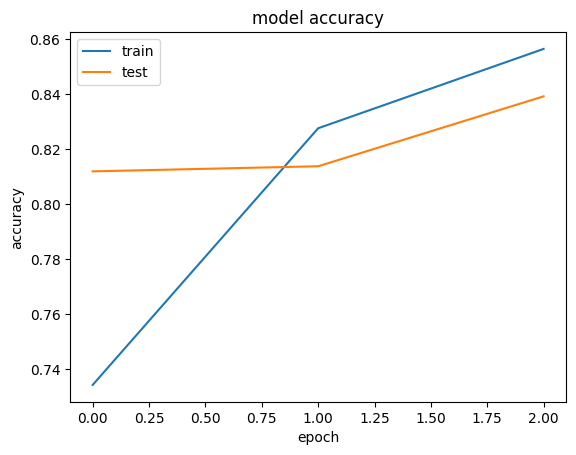

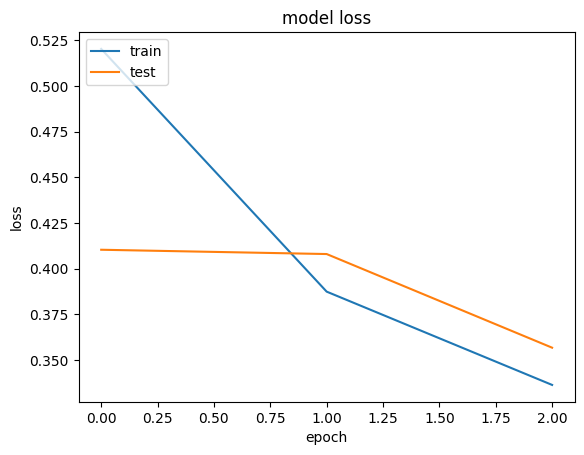

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history1.history['accuracy'])
plt.plot(cnn_model_history1.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history1.history['loss'])
plt.plot(cnn_model_history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')

In [ ]:
revieww=['This movie was boring musch more can be added like quality cinematograpy,dialogues.But overall movie was good']
tokenised=word_tokenizer.texts_to_sequences(revieww)

val=pad_sequences(tokenised,padding='post',maxlen=maxlen,truncating='post')
print(tokenised)
padded_input = pad_sequences([val[0]], maxlen=maxlen, padding='post', truncating='post')
prediction=cnn_model11.predict(padded_input)
print(f'Probability of positive sentiment: {prediction}')

[[3392, 2, 21029, 234, 30228, 35506, 18257, 1091, 6, 364, 55239, 3835, 5583, 409, 2, 21029, 7]]
1/1 [==============================] - 0s 78ms/step
Probability of positive sentiment: [[0.6412541]]


In [ ]:
joblib.dump(cnn_model11,'/content/drive/MyDrive/cnn.pkl')

['/content/drive/MyDrive/cnn.pkl']

In [ ]:
from keras.layers import LSTM

In [ ]:
lstm_model1=Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
lstm_model1.add(embedding_layer)
lstm_model1.add(LSTM(128))

lstm_model1.add(Dense(1,activation='sigmoid'))

In [ ]:
lstm_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          15021200  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15138577 (57.75 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 15021200 (57.30 MB)
_________________________________________________________________
None


In [ ]:

lstm_model_history1 = lstm_model1.fit(X1_train_tensor, y1_train_tensor, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
219/219 [==============================] - 140s 621ms/step - loss: 0.5305 - acc: 0.7308 - val_loss: 0.4665 - val_acc: 0.7814
Epoch 2/6
219/219 [==============================] - 108s 495ms/step - loss: 0.4235 - acc: 0.8105 - val_loss: 0.3971 - val_acc: 0.8247
Epoch 3/6
219/219 [==============================] - 97s 445ms/step - loss: 0.4034 - acc: 0.8240 - val_loss: 0.3678 - val_acc: 0.8373
Epoch 4/6
219/219 [==============================] - 105s 479ms/step - loss: 0.3532 - acc: 0.8481 - val_loss: 0.3456 - val_acc: 0.8514
Epoch 5/6
219/219 [==============================] - 110s 505ms/step - loss: 0.3293 - acc: 0.8597 - val_loss: 0.3293 - val_acc: 0.8597
Epoch 6/6
219/219 [==============================] - 98s 450ms/step - loss: 0.3099 - acc: 0.8704 - val_loss: 0.3146 - val_acc: 0.8667


In [ ]:
import numpy as np
lstm_score=lstm_model1.evaluate(X1_test,np.array(y1_test),verbose=1)

469/469 [==============================] - 40s 84ms/step - loss: 0.3228 - acc: 0.8647


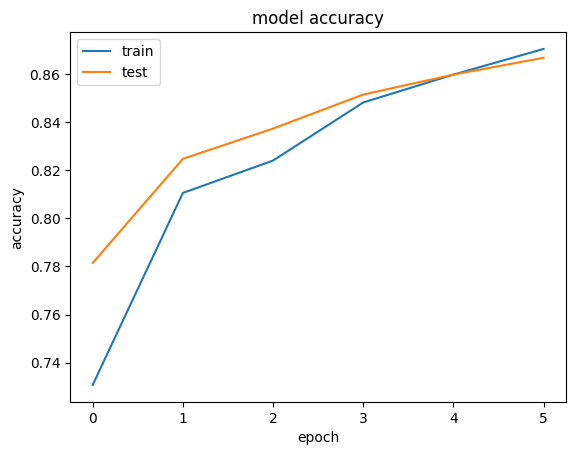

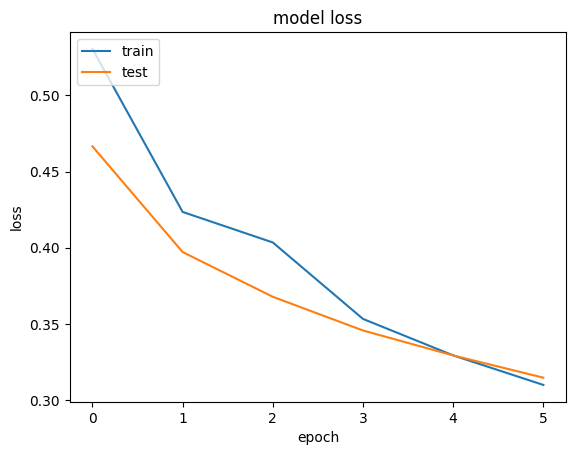

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history1.history['acc'])
plt.plot(lstm_model_history1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history1.history['loss'])
plt.plot(lstm_model_history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
revieww=['This movie was boring musch more can be added like quality cinematograpy,dialogues.But overall movie was good']
tokenised=word_tokenizer.texts_to_sequences(revieww)

val=pad_sequences(tokenised,padding='post',maxlen=maxlen,truncating='post')
print(tokenised)
padded_input = pad_sequences([val[0]], maxlen=maxlen, padding='post', truncating='post')
prediction=lstm_model1.predict(padded_input)
print(f'Probability of positive sentiment: {prediction}')

[[3392, 2, 21029, 234, 30228, 35506, 18257, 1091, 6, 364, 55239, 3835, 5583, 409, 2, 21029, 7]]
1/1 [==============================] - 0s 98ms/step
Probability of positive sentiment: [[0.39771473]]


In [ ]:
joblib.dump(lstm_model1,'/content/drive/MyDrive/lstm.pkl')

['/content/drive/MyDrive/lstm.pkl']

In [ ]:
joblib.dump(lstm_model1,'/content/drive/MyDrive/lstm.pkl')